- in our original agenda this week we try different covariance estimation method
- but I think we'd better go directly to regression model
- then we can save some time for further more complicate machine learning models


- this week we focus on the most simple linear regression without regularization

In [104]:
from helper import *
from stats import *
from product_info import *
from imp import reload  
import helper
import stats
reload(helper)
reload(stats)
get_daily_pred


<function helper.get_daily_pred(file_name, product, signal_list, coef, strat, HEAD_PATH)>

In [105]:
CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM

16

In [107]:
product_list = ["btc.usd.td", "eth.usd.td", "btc.usdt", "eth.usdt"]

In [108]:
period = 4096

In [109]:
import os
all_dates = os.listdir(DATA_PATH + product_list[0])
all_dates.sort()
all_dates = np.array(all_dates)
n_days = len(all_dates)
n_days
## 1059

1059

In [110]:
SAVE_PATH = "e:/intern"
all_dates_x = os.listdir(DATA_PATH + product_list[0])
all_dates_y = os.listdir(DATA_PATH + product_list[1])
all_dates = np.array(list(set(all_dates_x) & set(all_dates_y)))
all_dates.sort()
train_sample = all_dates<"2019-08"
test_sample = all_dates>"2019-08"
date_str = [n[0:10] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

In [111]:
import dask
from dask import compute, delayed
import sklearn.preprocessing

In [112]:
os.makedirs(HEAD_PATH+"/all signal", exist_ok=True)
dire_signal_list = ["nr", "dbook", "range.pos", "price.osci", "ma.dif.10", "kdj.k", "kdj.j"]
range_signal_list = ["", "range", "std", "trend.index"]
all_signal_list = np.array([])
for range_signal in range_signal_list:
    for dire_signal in dire_signal_list:
        if len(range_signal)==0:
            signal_name = dire_signal
        else:
            signal_name = dire_signal+"."+range_signal
        all_signal_list = np.append(all_signal_list,signal_name)
signal_list = [signal+".4096" for signal in all_signal_list]
np.append(signal_list, ["ret.4096", "ret.4096.001", "ret.4096.002"])
n_signal = len(signal_list)

In [114]:
train_sample = all_dates<"2019-08"
test_sample = all_dates>"2019-08"
date_str = [n[0:10] for n in all_dates]
format_dates = np.array([pd.to_datetime(d) for d in date_str])

- let's begin with week 8

In [115]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import lasso_path, LassoCV, RidgeCV
from sklearn.preprocessing import StandardScaler
#y_signal = "ret."+str(period)+".002"





In [116]:
product = product_list[0]
train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
y_signal = "ret.4096.004"

In [117]:
coef_list=dict([])
y_signal = "ret."+str(period)
for product in product_list[0:2]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    y_std = np.std(y_train)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef
    
# btc.usd.td
# [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.68265554e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00  1.95167918e-04  2.38697596e-05
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -4.32263089e-05 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
# eth.usd.td
# [ 0.00065234 -0.          0.         -0.         -0.03815203 -0.
#  -0.          0.00280568 -0.          0.          0.          0.00193783
#  -0.00013296 -0.00036149  0.00156066  0.          0.00856788  0.
#   0.         -0.         -0.00175056  0.         -0.         -0.
#  -0.         -0.         -0.         -0.00105104]

btc.usd.td
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.68265554e-05
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  1.95167918e-04  2.38697596e-05
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -4.32263089e-05 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
eth.usd.td
[ 0.00065234 -0.          0.         -0.         -0.03815203 -0.
 -0.          0.00280568 -0.          0.          0.          0.00193783
 -0.00013296 -0.00036149  0.00156066  0.          0.00856788  0.
  0.         -0.         -0.00175056  0.         -0.         -0.
 -0.         -0.         -0.         -0.00105104]


- it seems the result is too bad

In [118]:
coef_list=dict([])
y_signal = "ret."+str(period)+".004"
for product in product_list[0:2]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    x_train_normal = scaler.transform(x_train)
    y_std = np.std(y_train)
    model = LassoCV(n_alphas=100, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# btc.usd.td
# [ 0.00000000e+00  1.34008554e-03  7.15451197e-05 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.07077811e-06
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.61555653e-04
#   0.00000000e+00 -0.00000000e+00  1.20778277e-04  1.93687410e-04
#   0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -6.95227097e-05  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.26099631e-04]
# eth.usd.td
# [ 3.18599420e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -5.76361051e-04 -0.00000000e+00 -1.78394900e-04  0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -5.21677578e-05 -3.31251221e-07  0.00000000e+00  0.00000000e+00
#   0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.03792499e-03]


btc.usd.td
[ 0.00000000e+00  1.34008554e-03  7.15451197e-05 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.07077811e-06
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.61555653e-04
  0.00000000e+00 -0.00000000e+00  1.20778277e-04  1.93687410e-04
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -6.95227097e-05  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -2.26099631e-04]
eth.usd.td
[ 3.18599420e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -5.76361051e-04 -0.00000000e+00 -1.78394900e-04  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.21677578e-05 -3.31251221e-07  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.03792499e-03]


In [119]:
SAVE_PATH = "e:/intern"

In [120]:
save(coef_list, SAVE_PATH+"/coef.ret.4096.004.pkl")

- we can see that the result is not good

- it's still not good. So we cannot use lasso model

In [121]:
def par_get_signal_mat(file_name, product, signal_list, HEAD_PATH, SAVE_PATH):
    data = load(HEAD_PATH+"/pkl tick/"+product+"/"+file_name)
    signal_mat = functools.reduce(functools.partial(get_signal_mat, product=product, file_name=file_name, HEAD_PATH=SAVE_PATH), signal_list, None)
    save(signal_mat, SAVE_PATH+"/signal mat pkl/"+product+"/"+file_name)

In [122]:
def par_get_daily_pred(file_name, product, coef, strat, HEAD_PATH):
    signal_mat = load(HEAD_PATH+"/signal mat pkl/"+product+"/"+file_name)
    S = np.dot(signal_mat.transpose(),coef)
    save(S, HEAD_PATH+"/tmp pkl/"+product+"/"+strat+"/"+file_name)      



- now let's try lasso regression

In [123]:
strat = "lasso.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [124]:
coef_list = load(SAVE_PATH+"/coef.ret.4096.004.pkl")

In [27]:
## good are MA,ZC

In [125]:
for product in product_list[:2]:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [126]:
os.makedirs("e:/intern"+"/signal mat pkl", exist_ok=True)
for product in product_list[:2]:
    os.makedirs("e:/intern"+"/signal mat pkl/"+product, exist_ok=True)

In [127]:
%%time
for product in product_list[0:2]:
    print(product)
    parLapply(CORE_NUM, all_dates, par_get_signal_mat, product=product, signal_list=signal_list, HEAD_PATH=HEAD_PATH, SAVE_PATH=SAVE_PATH)
    
# btc.usd.td
# eth.usd.td
# Wall time: 8min 42s





btc.usd.td
eth.usd.td
Wall time: 8min 42s


In [128]:
%%time
for product in product_list[0:2]:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# btc.usd.td
# eth.usd.td
# Wall time: 33.1 s


btc.usd.td
eth.usd.td
Wall time: 33.1 s


In [129]:
%%time
for product in product_list[0:2]:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")

## Wall time: 22.9 s


Wall time: 22.9 s


In [139]:
%%time
for product in product_list[0:2]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("lasso.004", all_dates, product, 2/spread, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2019-08", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20/spread, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# Wall time: 4min 21s


reverse=1
reverse=1
Wall time: 4min 21s


btc.usd.td train sharpe  1.9947577477580274 test sharpe  2.5970644747614204
eth.usd.td train sharpe  1.8983635762340487 test sharpe  0.915109681239281
train sharpe:  2.2215612577122523 test sharpe:  2.449891311205896


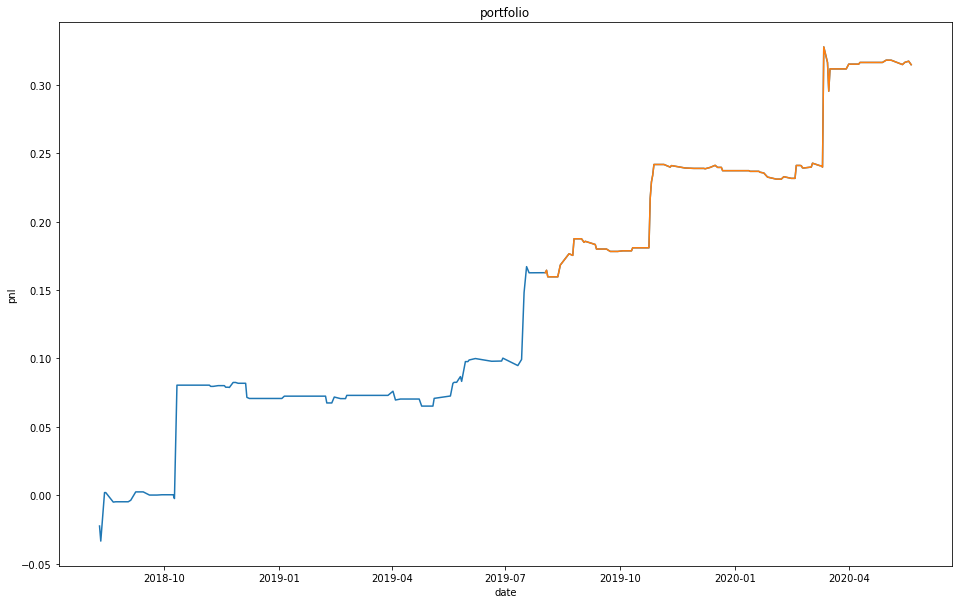

In [140]:
i = 0
strat = "lasso.004.4096"
test_all_pnl = np.zeros([sum(test_sample), 4])
train_all_pnl = np.zeros([sum(train_sample), 4])
min_pnl = 10
min_num = 10
for product in product_list[0:2]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# btc.usd.td train sharpe  1.9947577477580274 test sharpe  2.5970644747614204
# eth.usd.td train sharpe  1.8983635762340487 test sharpe  0.915109681239281
# train sharpe:  2.2215612577122523 test sharpe:  2.449891311205896




- The result is not good
- Now we go to ridge

In [134]:
coef_list=dict([])
y_signal= "ret." + str(period)+".004"
for product in product_list[0:2]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = RidgeCV(fit_intercept=False, cv=5).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# btc.usd.td
# [ 2.42061396e-03  6.48391728e-03  6.92423055e-03 -1.92154730e-05
#  -3.97781233e-02  7.93020996e-04 -2.05602380e-03 -2.89105049e-05
#  -3.43527336e-04  4.54757653e-05 -1.09551074e-06  3.70549599e-04
#   1.31810644e-05 -2.18140618e-05  3.40615936e-04  1.16043438e-03
#  -2.04504364e-05 -5.73677725e-05  3.90730599e-04  5.51580968e-06
#  -8.08675178e-05 -1.64833465e-03  1.02243306e-03 -8.71656354e-03
#  -3.20042880e-05  6.87185785e-02 -1.58688525e-03  2.71981921e-03]
# eth.usd.td
# [ 1.18368119e-02 -2.09542800e-03  2.26411135e-03  7.30532555e-04
#  -1.88065491e-01  3.03893815e-04 -1.05106169e-03  2.11890219e-03
#  -1.18692596e-02  1.38401221e-04 -1.34563640e-04  2.38134286e-03
#  -6.75090236e-04  9.95406286e-05 -3.23159094e-03  3.06485871e-02
#   5.94116106e-03  1.50343793e-03 -5.32115924e-03  5.86698563e-04
#  -1.97589445e-03 -1.11715001e-02  1.90447310e-02  5.24666859e-03
#  -2.22259762e-03  2.19131496e-01  1.29699182e-03 -3.10210715e-03]


btc.usd.td
[ 2.42061396e-03  6.48391728e-03  6.92423055e-03 -1.92154730e-05
 -3.97781233e-02  7.93020996e-04 -2.05602380e-03 -2.89105049e-05
 -3.43527336e-04  4.54757653e-05 -1.09551074e-06  3.70549599e-04
  1.31810644e-05 -2.18140618e-05  3.40615936e-04  1.16043438e-03
 -2.04504364e-05 -5.73677725e-05  3.90730599e-04  5.51580968e-06
 -8.08675178e-05 -1.64833465e-03  1.02243306e-03 -8.71656354e-03
 -3.20042880e-05  6.87185785e-02 -1.58688525e-03  2.71981921e-03]
eth.usd.td
[ 1.18368119e-02 -2.09542800e-03  2.26411135e-03  7.30532555e-04
 -1.88065491e-01  3.03893815e-04 -1.05106169e-03  2.11890219e-03
 -1.18692596e-02  1.38401221e-04 -1.34563640e-04  2.38134286e-03
 -6.75090236e-04  9.95406286e-05 -3.23159094e-03  3.06485871e-02
  5.94116106e-03  1.50343793e-03 -5.32115924e-03  5.86698563e-04
 -1.97589445e-03 -1.11715001e-02  1.90447310e-02  5.24666859e-03
 -2.22259762e-03  2.19131496e-01  1.29699182e-03 -3.10210715e-03]


In [135]:
save(coef_list, SAVE_PATH+"/coef.ridge.004.pkl")

In [136]:
strat = "ridge.004."+str(period)
for product in product_list:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [137]:
%%time
for product in product_list[0:2]:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")

# btc.usd.td
# eth.usd.td
# Wall time: 31.6 s


btc.usd.td
eth.usd.td
Wall time: 31.6 s


In [141]:
%%time
for product in product_list[0:2]:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")
    
# Wall time: 18.7 s

Wall time: 18.9 s


In [145]:
%%time
SAVE_PATH = "e:/intern"
for product in product_list[0:2]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("ridge.004", all_dates, product, 2/spread, 20/spread, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2019-08", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20/spread, save_path="signal result atr",reverse=1)

# reverse=1
# reverse=1
# Wall time: 4min 26s



reverse=1
reverse=1
Wall time: 4min 26s


btc.usd.td train sharpe  0.41262980449668935 test sharpe  2.3453526530638222
eth.usd.td train sharpe  1.6222627662008389 test sharpe  -1.9638773186498046
train sharpe:  1.7020421408256936 test sharpe:  1.574418158915555


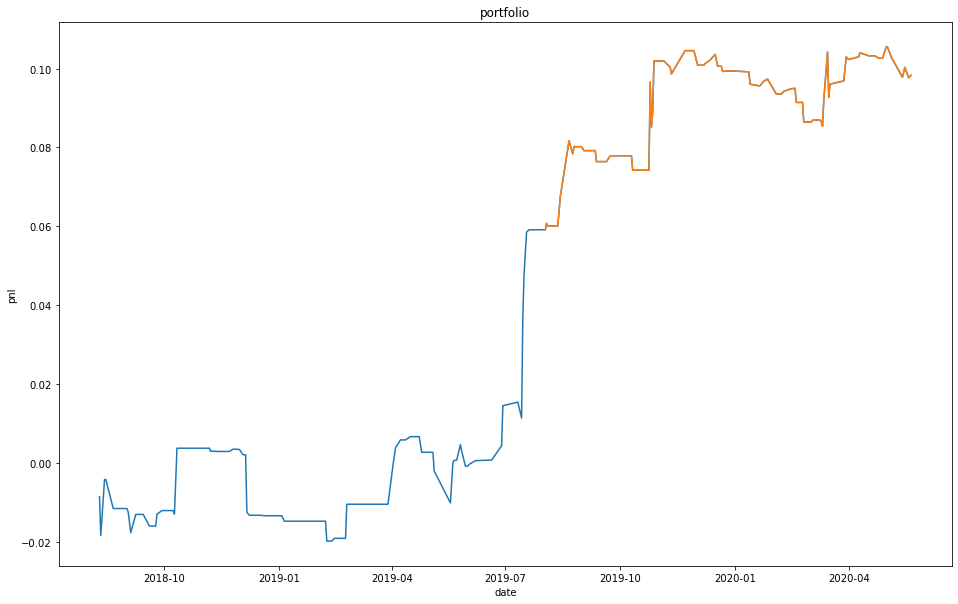

In [146]:
i = 0
strat = "ridge.004.4096"
test_all_pnl = np.zeros([sum(test_sample), len(product_list)])
train_all_pnl = np.zeros([sum(train_sample), len(product_list)])
min_pnl = 2
min_num = 10
for product in product_list[0:2]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))    

# btc.usd.td train sharpe  0.41262980449668935 test sharpe  2.3453526530638222
# eth.usd.td train sharpe  1.6222627662008389 test sharpe  -1.9638773186498046
# train sharpe:  1.7020421408256936 test sharpe:  1.574418158915555




In [147]:
from sklearn.linear_model import ElasticNetCV

In [148]:
strat = "elastic.004."+str(period)

In [149]:
for product in product_list:
    os.makedirs(SAVE_PATH+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [152]:
coef_list=dict([])
y_signal= "ret." + str(period)+".004"
for product in product_list[0:2]:
    train_mat = load(HEAD_PATH+"/train test mat/"+product+".train.mat.pkl")
    x_train = train_mat.iloc[:, :n_signal].values
    y_train = train_mat.loc[:, y_signal].values
    scaler =  StandardScaler(copy=True, with_mean=False, with_std=True)
    scaler.fit(x_train)
    x_std = np.sqrt(scaler.var_)
    y_std = np.std(y_train)
    x_train_normal = scaler.transform(x_train)
    model = ElasticNetCV(n_alphas=100, l1_ratio=0.5, fit_intercept=False, cv=5, max_iter=10000).fit(x_train_normal, y_train/y_std)
    coef = model.coef_/x_std*y_std
    print(product)
    print(coef)
    coef_list[product] = coef

# btc.usd.td
# [ 0.00000000e+00  8.71477075e-04  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.04877607e-05
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.28794761e-04
#   0.00000000e+00 -0.00000000e+00  7.41657182e-05  1.98431599e-04
#  -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
#  -6.25347815e-05  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.96989007e-04]
# eth.usd.td
# [ 4.57421527e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -3.23390145e-03 -0.00000000e+00 -3.27244609e-04  0.00000000e+00
#  -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
#  -6.66618077e-05 -9.28860569e-05  7.31155657e-05  0.00000000e+00
#   1.19181327e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
#  -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
#  -1.55635644e-04 -0.00000000e+00 -0.00000000e+00 -9.73884417e-04]

btc.usd.td
[ 0.00000000e+00  8.71477075e-04  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  1.04877607e-05
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  2.28794761e-04
  0.00000000e+00 -0.00000000e+00  7.41657182e-05  1.98431599e-04
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -6.25347815e-05  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -1.96989007e-04]
eth.usd.td
[ 4.57421527e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -3.23390145e-03 -0.00000000e+00 -3.27244609e-04  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -6.66618077e-05 -9.28860569e-05  7.31155657e-05  0.00000000e+00
  1.19181327e-03  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -1.55635644e-04 -0.00000000e+00 -0.00000000e+00 -9.73884417e-04]


In [153]:
save(coef_list, SAVE_PATH+"/coef.elastic.004.pkl")

In [154]:
strat = "elastic.004."+str(period)
for product in product_list[0:2]:
    os.makedirs("e:/intern"+"/tmp pkl/"+product+"/"+strat, exist_ok=True)

In [155]:
%%time
for product in product_list[0:2]:
    print(product)
    coef = coef_list[product]
    parLapply(CORE_NUM, all_dates, par_get_daily_pred, 
              product=product, coef=coef, strat=strat, HEAD_PATH="e:/intern")
    
# btc.usd.td
# eth.usd.td
# Wall time: 31.4 s



btc.usd.td
eth.usd.td
Wall time: 31.4 s


In [156]:
%%time
for product in product_list[0:2]:
    par_get_all_signal(strat, all_dates, product, 4096, SAVE_PATH="e:/intern")
    
# Wall time: 18.9 s


Wall time: 18.9 s


In [158]:
%%time
SAVE_PATH = "e:/intern"
for product in product_list[0:2]:
    spread = product_info[product]["spread"]
    tranct = product_info[product]["tranct"]
    tranct_ratio = product_info[product]["tranct.ratio"]
    evaluate_signal("elastic.004", all_dates, product, 2/spread, 20, 
                    CORE_NUM, HEAD_PATH, SAVE_PATH, period=4096, split_str="2019-08", tranct=tranct, 
                    max_spread=spread*1.1, tranct_ratio=tranct_ratio, atr_filter=20/spread, save_path="signal result atr",reverse=1)
    
# reverse=1
# reverse=1
# Wall time: 4min 39s



reverse=1
reverse=1
Wall time: 4min 39s


btc.usd.td train sharpe  2.347117299669759 test sharpe  2.3906379881234656
eth.usd.td train sharpe  2.154755614125246 test sharpe  1.3275573615797207
train sharpe:  2.6003971620018316 test sharpe:  2.2497581529684783


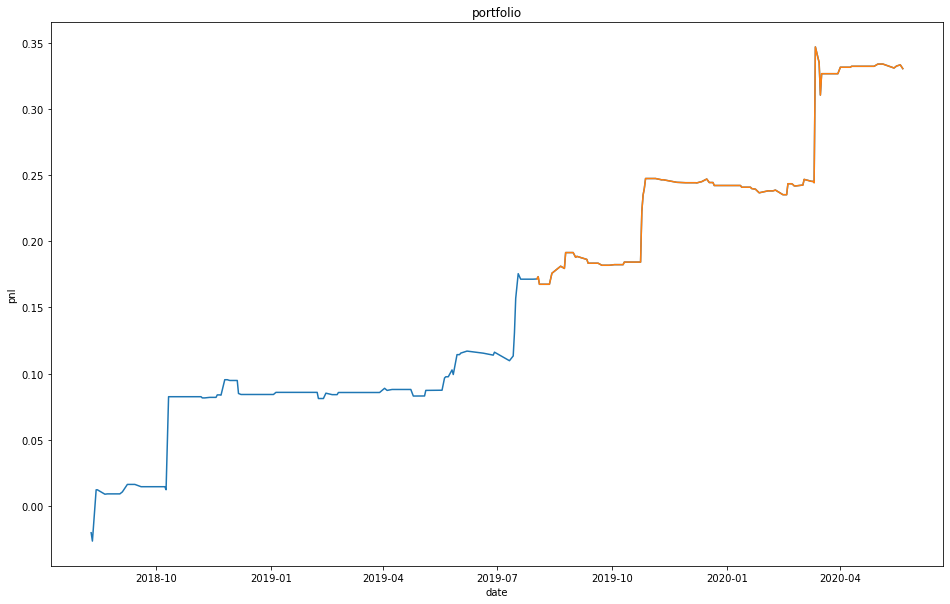

In [159]:
i = 0
strat = "elastic.004.4096"
test_all_pnl = np.zeros([sum(test_sample), 4])
train_all_pnl = np.zeros([sum(train_sample), 4])
min_pnl = 4
min_num = 10
for product in product_list[:2]:
    spread = product_info[product]["spread"]
    signal_stat = load(HEAD_PATH+"/signal result atr/"+product+"."+strat+".trend.pkl")
    train_stat = signal_stat["train.stat"]
    good_strat = (train_stat["final.result"]["avg.pnl"]>min_pnl*spread) & (train_stat["final.result"]["num"]>min_num)
    train_pnl = train_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    test_stat = signal_stat["test.stat"]
    test_pnl = test_stat["daily.ret"].loc[:, good_strat].sum(axis=1)/sum(good_strat)
    print(product, "train sharpe ", sharpe(train_pnl), "test sharpe ", sharpe(test_pnl))
    test_all_pnl[:,i] = test_pnl
    train_all_pnl[:,i] = train_pnl
    i = i+1
train_portfolio = np.array(np.mean(train_all_pnl, axis=1))
test_portfolio = np.array(np.mean(test_all_pnl, axis=1))
all_portfolio = np.append(train_portfolio, test_portfolio)
plt.figure(1, figsize=(16, 10));
plt.title("");
plt.xlabel("date");
plt.ylabel("pnl");
plt.title("portfolio");
plt.plot(format_dates, all_portfolio.cumsum());
plt.plot(format_dates[test_sample], all_portfolio.cumsum()[test_sample])
print("train sharpe: ", sharpe(train_portfolio), "test sharpe: ", sharpe(test_portfolio))   

# btc.usd.td train sharpe  2.347117299669759 test sharpe  2.3906379881234656
# eth.usd.td train sharpe  2.154755614125246 test sharpe  1.3275573615797207
# train sharpe:  2.6003971620018316 test sharpe:  2.2497581529684783



- output to txt file

In [126]:
os.makedirs("d:/intern/input", exist_ok=True)
np.set_printoptions(suppress=True)

In [127]:
for product in product_list:
    file_name = "d:/intern/input/"+product+".signal.txt"
    fo = open(file_name, "w")
    fo.writelines("signal coef\n")
    chosen_signal = coef_list[product]!=0
    for i in np.where(chosen_signal)[0]:
        fo.writelines(signal_list[i]+" "+str(coef_list[product][i])+"\n")
    fo.close()